# Import libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Make Dataset

In [160]:
X,y = make_regression(n_samples=5, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

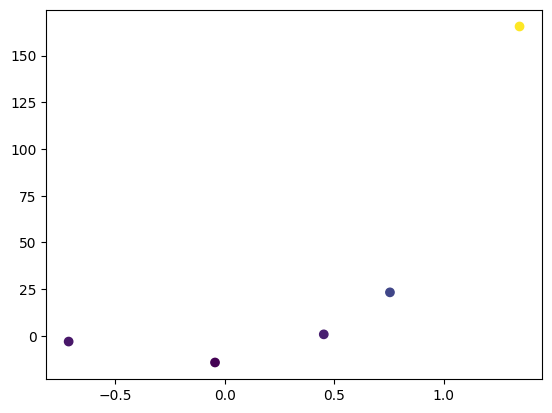

In [161]:
plt.scatter(X, y, c=y)

# Apply Linear Regression

In [162]:
reg = LinearRegression()

In [163]:
reg.fit(X,y)

LinearRegression()

## Find coeffiant and intercept

In [164]:
reg.coef_

array([74.25418669])

In [165]:
reg.intercept_

7.793295813898464

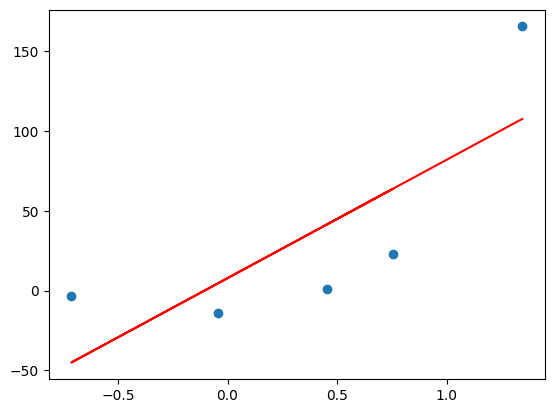

In [166]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

# Play with Gradient Descent with `m=87.93`
> => C<sub>new</sub> = C<sub>old</sub> - η*Slop

> Slop = -2 * ( Y<sub>i</sub> - m * X<sub>i</sub> - C<sub>assume</sub> )


## At Initials `C = 1000`

In [167]:
# Lets apply Gradient Descent assuming slope is constant m = 87.93
# and let's assume the starting value for intercept c = 0
y_pred = ((87.93 * X) + 1000).reshape(5)

In [168]:
reg.coef_, reg.intercept_

(array([74.25418669]), 7.793295813898464)

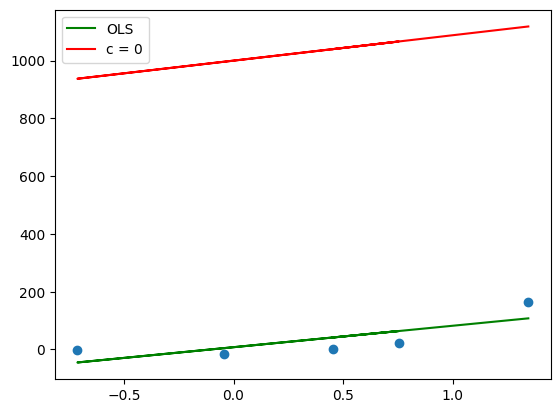

In [169]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='green',label='OLS')
plt.plot(X,y_pred,color='red',label='c = 0')
plt.legend()
plt.show()

In [170]:
m = 87.93
lr = 0.01

## Epochs 1

In [171]:
c = 0 #Assume
loss_slop = -2 * np.sum( y - m * X.ravel() - c)
loss_slop

-28.869974485494836

In [172]:
step_size = lr * loss_slop
step_size

-0.28869974485494837

In [173]:
c = c - step_size
c

0.28869974485494837

In [174]:
y_pred1 = ((87.93 * X) + c).reshape(5)

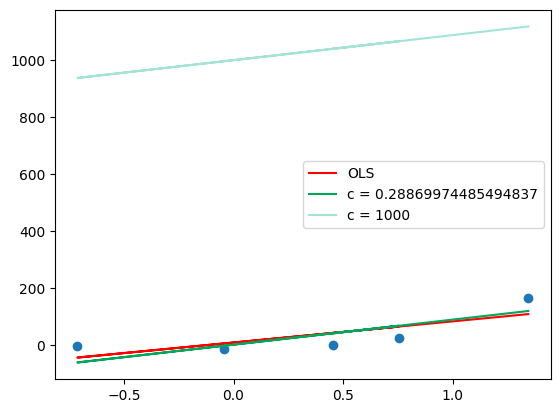

In [175]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred,color='#A3E4D7',label='c = 1000')
plt.legend()
plt.show()

## Epochs 2

In [176]:
c

0.28869974485494837

In [177]:
loss_slop2 = -2*np.sum(y-m*X.ravel()-c)
loss_slop2

-25.9829770369454

In [178]:
step_size2 = loss_slop2*lr
step_size

-0.28869974485494837

In [179]:
c = c - step_size2
c

0.5485295152244023

In [180]:
y_pred2 = ((87.93 * X) + c).reshape(5)

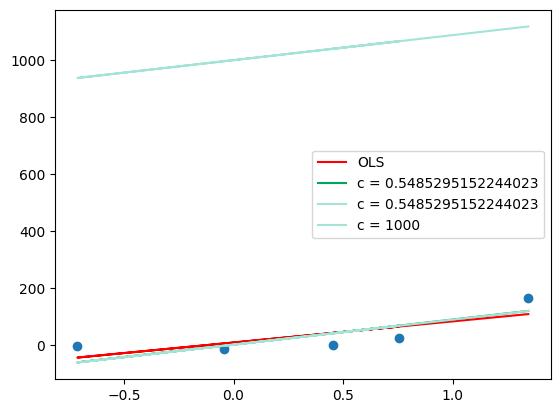

In [181]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred1,color='#A3E4D7',label='c = {}'.format(c))
plt.plot(X,y_pred,color='#A3E4D7',label='c = 1000')
plt.legend()
plt.show()

## Epochs 3

In [182]:
loss_slop3 = -2 * np.sum(y - m * X.ravel() - c)
loss_slop3

-23.384679333250816

In [183]:
step_size3 = lr * loss_slop3
step_size3

-0.23384679333250816

In [184]:
c = c-step_size3

In [185]:
c

0.7823763085569104

In [186]:
y_pred3 = ((87.93 * X) + c).reshape(5)

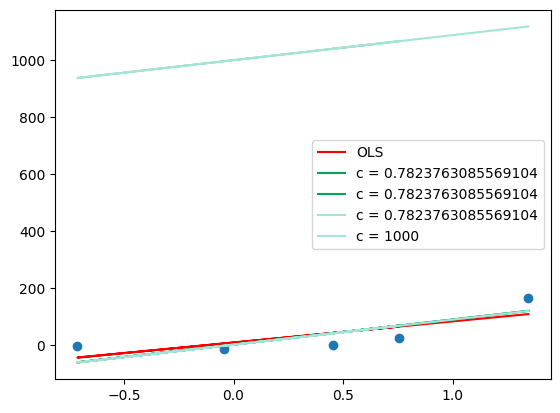

In [187]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred2,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred1,color='#A3E4D7',label='c = {}'.format(c))
plt.plot(X,y_pred,color='#A3E4D7',label='c = 1000')
plt.legend()
plt.show()

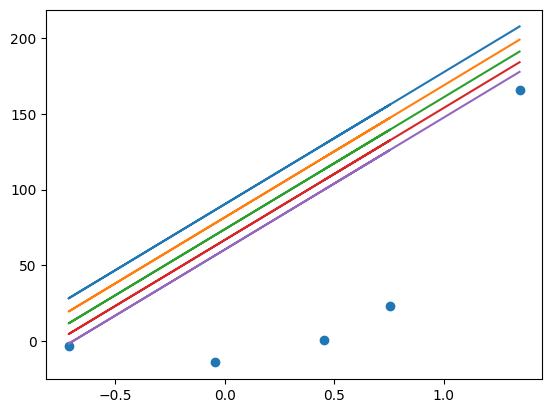

In [188]:
c = 100
m = 87.35
lr = 0.01

epochs = 5

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - c)
  c = c - (lr * loss_slope)

  y_pred = m * X + c

  plt.plot(X,y_pred)

plt.scatter(X,y)